<a href="https://colab.research.google.com/github/XimenaRamirezA/AI-FIME-2024/blob/main/Pr%C3%A1ctica_3_Operaciones_aritm%C3%A9ticas_y_l%C3%B3gicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Práctica 3.- Operaciones aritméticas y lógicas.**

Ximena Ramirez

Fernanado Álvarez

Gonzalo Ponzio

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#Importación de librerías.

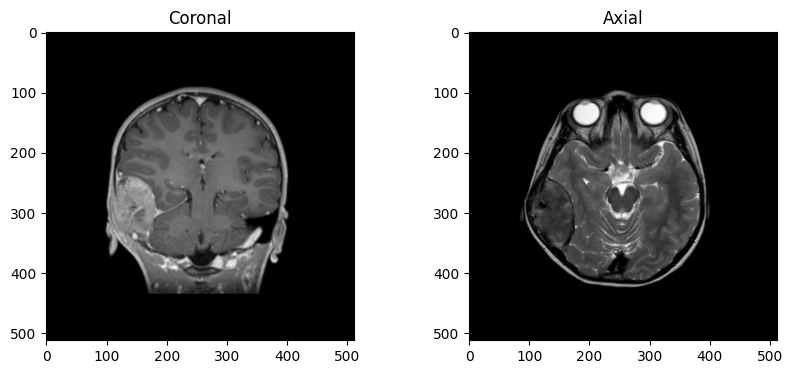

In [21]:
# Cargar imágenes en escala de grises
img1 = cv2.imread("coronal_t1.jpeg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("axial_t2.jpeg", cv2.IMREAD_GRAYSCALE)

# Ajustar al mismo tamaño (usar tamaño de la primera imagen)
img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Mostrar imágenes originales
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Coronal")
plt.imshow(img1, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Axial")
plt.imshow(img2_resized, cmap='gray')
plt.show()

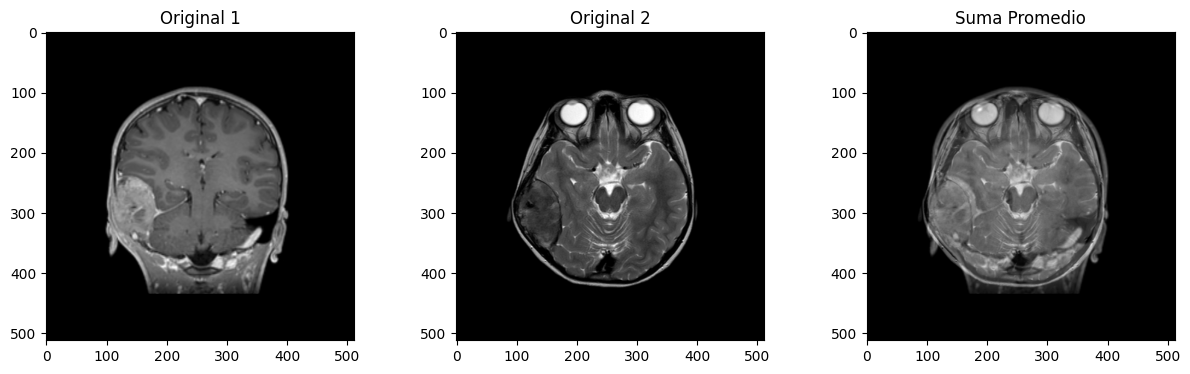

In [22]:
#PARTE 1. Operaciones aritméticas
#Ejercicio 1: Suma de imágenes
# 1. Suma ponderada
suma_ponderada = cv2.addWeighted(img1, 0.7, img2_resized, 0.3, 0)

# 2. Suma promedio
suma_promedio = cv2.addWeighted(img1, 0.5, img2_resized, 0.5, 0)

# 3. Mostrar resultados
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.title("Original 1")
plt.imshow(img1, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Original 2")
plt.imshow(img2_resized, cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Suma Promedio")
plt.imshow(suma_promedio, cmap='gray')
plt.show()


Se cargaron dos imágenes médicas en escala de grises.

Como tenían diferentes resoluciones, se redimensionó una de ellas usando cv2.resize() para que tuvieran el mismo tamaño.

Se aplicó la suma de imágenes utilizando dos enfoques:

Suma ponderada con pesos diferentes para cada imagen.

Suma promedio, promediando píxel a píxel las dos imágenes con pesos iguales (0.5 y 0.5).

Finalmente, se mostraron los resultados para comparar la fusión de intensidades.



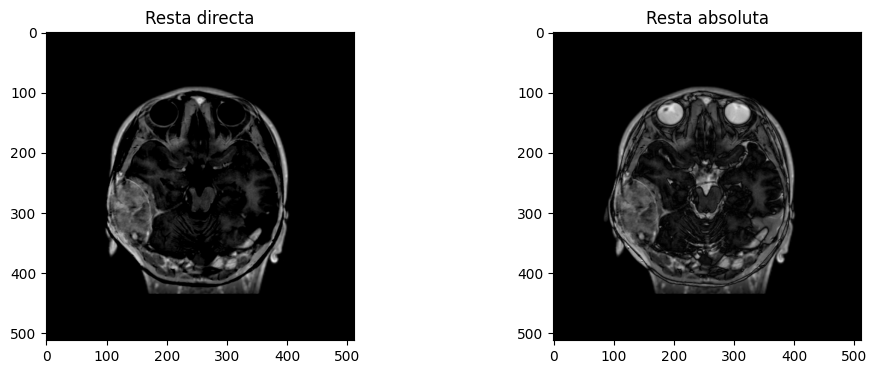

In [23]:
#Ejercicio 2: Resta de imágenes

# 1. Resta directa (puede tener negativos)
resta = cv2.subtract(img1, img2_resized)

# 2. Resta absoluta con cv2.absdiff
resta_abs = cv2.absdiff(img1, img2_resized)

# 3. Mostrar resultados
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Resta directa")
plt.imshow(resta, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Resta absoluta")
plt.imshow(resta_abs, cmap='gray')
plt.show()


Se restaron directamente las dos imágenes usando cv2.subtract(), pero este método puede recortar los valores negativos a 0.

Para evitar ese efecto, se usó la función cv2.absdiff(), que calcula la diferencia absoluta entre las imágenes, manteniendo todos los cambios independientemente del signo.

Esta técnica es útil para identificar áreas donde hubo modificaciones o anomalías.

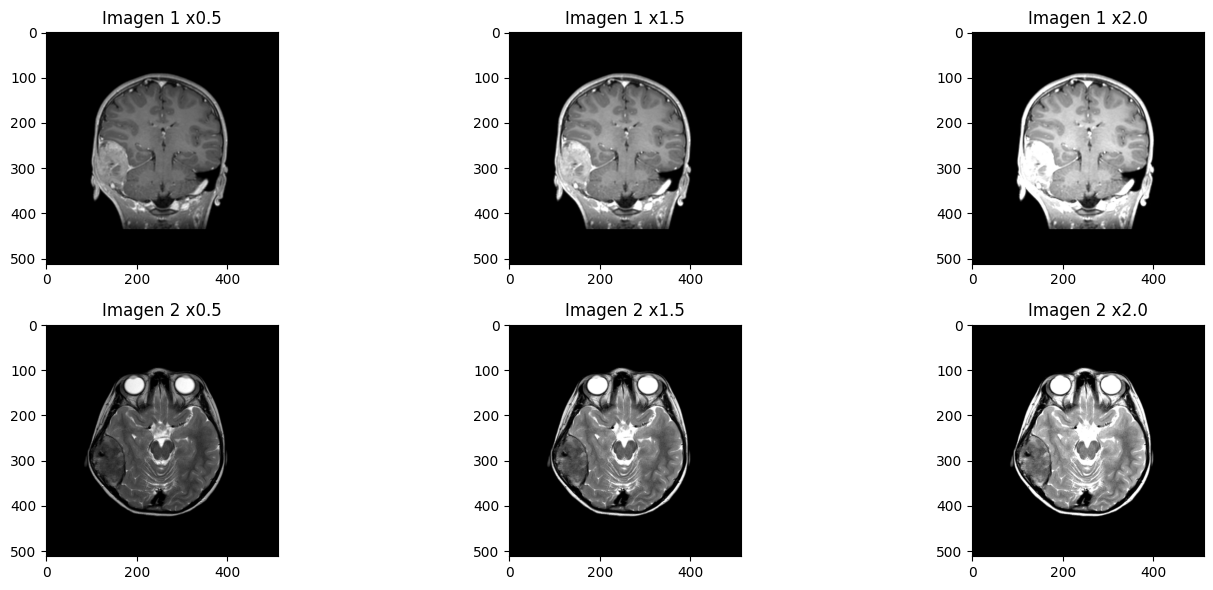

In [24]:
#Ejercicio 3: Multiplicación por un factor (ajuste de brillo)
factores = [0.5, 1.5, 2.0]

plt.figure(figsize=(15, 6))
for i, f in enumerate(factores):
    mod1 = cv2.convertScaleAbs(img1, alpha=f, beta=0)
    mod2 = cv2.convertScaleAbs(img2_resized, alpha=f, beta=0)
    plt.subplot(2, 3, i+1)
    plt.title(f"Imagen 1 x{f}")
    plt.imshow(mod1, cmap='gray')
    plt.subplot(2, 3, i+4)
    plt.title(f"Imagen 2 x{f}")
    plt.imshow(mod2, cmap='gray')
plt.tight_layout()
plt.show()


Se aplicaron tres factores diferentes de brillo (0.5, 1.5 y 2.0) usando cv2.convertScaleAbs().

Esta operación multiplicó cada valor de píxel por un factor para aumentar o disminuir la intensidad.

Se evaluaron los resultados visualmente para observar el impacto de los cambios de brillo en la interpretación médica.

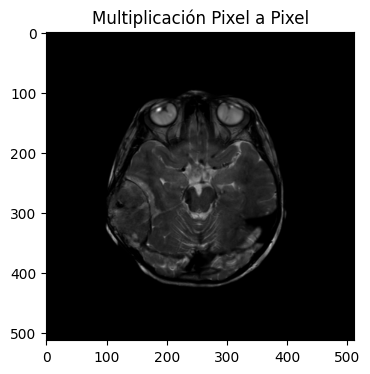

In [25]:
# Ejercicio 4: Multiplicación elemento por elemento

# Asegurarse que estén en formato float para evitar overflow
img1_float = img1.astype(np.float32) / 255
img2_float = img2_resized.astype(np.float32) / 255

multiplicacion_elemento = img1_float * img2_float
multiplicacion_elemento = (multiplicacion_elemento * 255).astype(np.uint8)

plt.figure(figsize=(6, 4))
plt.title("Multiplicación Pixel a Pixel")
plt.imshow(multiplicacion_elemento, cmap='gray')
plt.show()

Ambas imágenes se normalizaron a valores flotantes entre 0 y 1.

Se realizó una multiplicación punto a punto, es decir, cada píxel de una imagen se multiplicó con el correspondiente de la otra.

Este tipo de operación es común para aplicar máscaras o para resaltar regiones coincidentes en imágenes médicas.




---



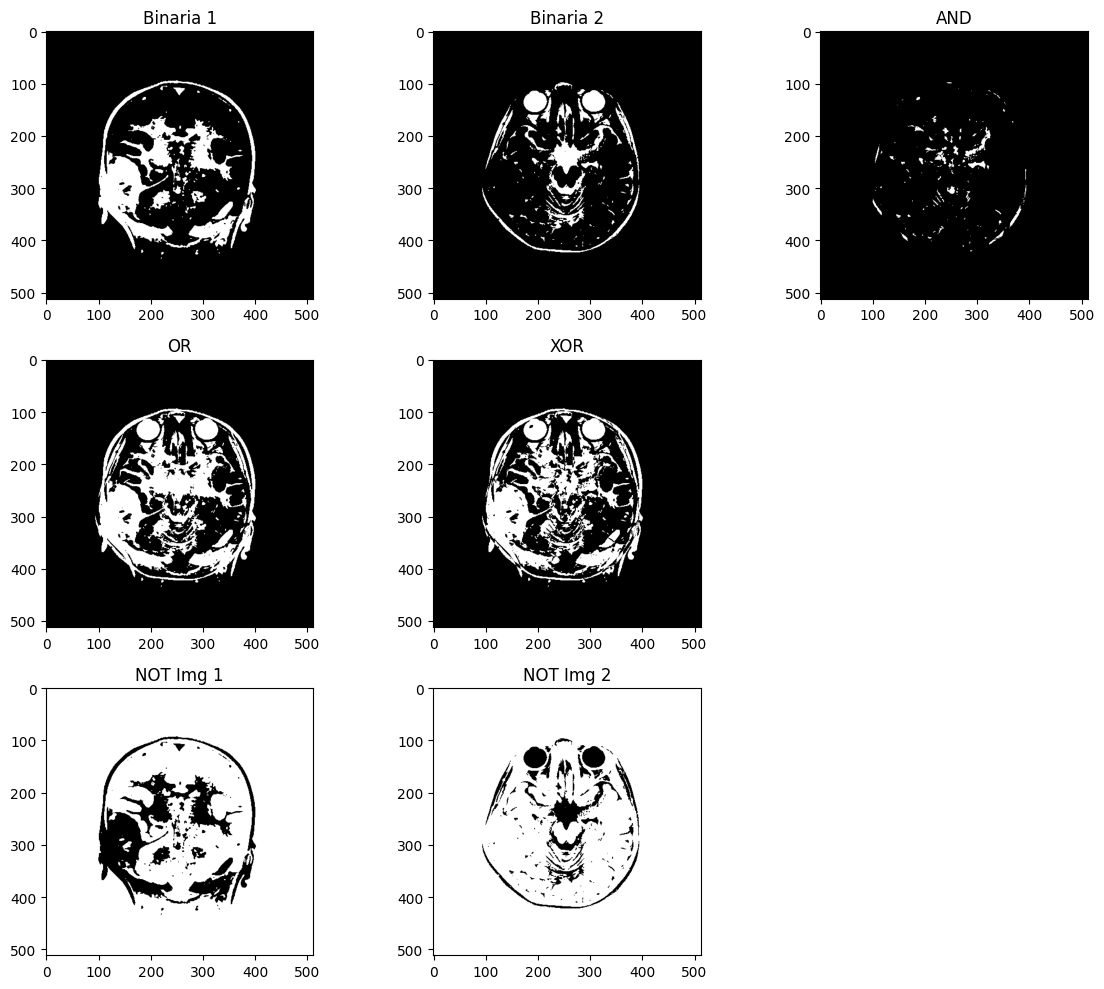

In [26]:
#Parte II - Operaciones lógicas AND, OR, XOR y NOT
#Ejercicio 5: Operaciones lógicas

# 1. Convertir imágenes a binarias con un umbral (threshold)
_, bin1 = cv2.threshold(img1, 100, 255, cv2.THRESH_BINARY)
_, bin2 = cv2.threshold(img2_resized, 100, 255, cv2.THRESH_BINARY)

# 2. Operaciones lógicas entre imágenes binarias
and_img = cv2.bitwise_and(bin1, bin2)
or_img = cv2.bitwise_or(bin1, bin2)
xor_img = cv2.bitwise_xor(bin1, bin2)

# 3. Operación NOT
not_img1 = cv2.bitwise_not(bin1)
not_img2 = cv2.bitwise_not(bin2)

# 4. Mostrar resultados
plt.figure(figsize=(12, 10))

plt.subplot(3, 3, 1)
plt.title("Binaria 1")
plt.imshow(bin1, cmap='gray')
plt.subplot(3, 3, 2)
plt.title("Binaria 2")
plt.imshow(bin2, cmap='gray')
plt.subplot(3, 3, 3)
plt.title("AND")
plt.imshow(and_img, cmap='gray')

plt.subplot(3, 3, 4)
plt.title("OR")
plt.imshow(or_img, cmap='gray')
plt.subplot(3, 3, 5)
plt.title("XOR")
plt.imshow(xor_img, cmap='gray')

plt.subplot(3, 3, 7)
plt.title("NOT Img 1")
plt.imshow(not_img1, cmap='gray')
plt.subplot(3, 3, 8)
plt.title("NOT Img 2")
plt.imshow(not_img2, cmap='gray')

plt.tight_layout()
plt.show()


Se convirtieron ambas imágenes a binario mediante un umbral fijo usando cv2.threshold().

Se aplicaron las operaciones lógicas usando funciones de OpenCV:

cv2.bitwise_and(): Intersección entre ambas imágenes.

cv2.bitwise_or(): Unión de las regiones blancas.

cv2.bitwise_xor(): Regiones donde las imágenes difieren.

cv2.bitwise_not(): Inversión de cada imagen.

Los resultados se visualizaron en una cuadrícula para comparar cómo cada operación afecta la segmentación de regiones.




---



**Parte III - Preguntas**

*¿Cómo puede ayudar la suma de imágenes en la combinación de datos de distintas modalidades médicas?*

La suma de imágenes permite fusionar información de distintas modalidades médicas (por ejemplo, resonancia magnética y tomografía), resaltando características complementarias y facilitando el análisis conjunto. Esto es útil para diagnóstico más preciso, planificación quirúrgica o estudios comparativos.

*¿En qué situaciones se podría usar la resta de imágenes en el análisis biomédico?*

La resta es útil para detectar cambios o diferencias entre dos estudios de la misma región anatómica, como en la comparación de imágenes antes y después de un tratamiento o cirugía. También puede ayudar a identificar regiones anormales, como tumores o lesiones.

*¿Cómo afectan las operaciones lógicas a la segmentación de imágenes médicas?*

Las operaciones lógicas son fundamentales en la segmentación de imágenes, especialmente en el procesamiento binario. Por ejemplo, el operador AND puede utilizarse para aplicar máscaras, OR para combinar segmentaciones, XOR para identificar diferencias y NOT para invertir regiones. Esto permite un procesamiento más preciso de estructuras anatómicas o patologías específicas.

